# Intelligent Classification of Rural Infrastructure Projects (PMGSY)

# 📌 1. Import Libraries


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

# 📌 2. Load the Dataset

In [14]:
import pandas as pd

# Load the dataset
df = pd.read_csv("PMGSY_DATASET.csv")

# Show basic info
print("Shape:", df.shape)
df.head()

Shape: (2189, 15)


,STATE_NAME,DISTRICT_NAME,PMGSY_SCHEME,NO_OF_ROAD_WORK_SANCTIONED,LENGTH_OF_ROAD_WORK_SANCTIONED,NO_OF_BRIDGES_SANCTIONED,COST_OF_WORKS_SANCTIONED,NO_OF_ROAD_WORKS_COMPLETED,LENGTH_OF_ROAD_WORK_COMPLETED,NO_OF_BRIDGES_COMPLETED,EXPENDITURE_OCCURED,NO_OF_ROAD_WORKS_BALANCE,LENGTH_OF_ROAD_WORK_BALANCE,NO_OF_BRIDGES_BALANCE,Unnamed: 14
0,Andaman And Nicobar,Nicobar,PMGSY-I,3,2.969,0,1.38570,3,2.969,0,1.1082,0,0.000,0,NaN
1,Andaman And Nicobar,North and Middle Andaman,PMGSY-I,32,60.169,0,24.69080,32,59.190,0,18.5754,0,0.000,0,NaN
2,Andaman And Nicobar,North and Middle Andaman,PMGSY-II,24,54.670,0,27.76460,0,0.000,0,0.0000,24,54.670,0,NaN
3,Andaman And Nicobar,South Andaman,PMGSY-I,32,40.146,0,18.53750,31,39.287,0,11.6894,1,0.541,0,NaN
4,Andaman And Nicobar,South Andaman,PMGSY-II,24,41.992,0,23.42439,7,17.747,0,8.6343,17,24.033,0,NaN


# 📌 3. Basic EDA

In [15]:
# Drop the unnamed column
df = df.drop(columns=["Unnamed: 14"])

# Check for null values
print("Null values per column:")
print(df.isnull().sum())

# Remove rows with any nulls (optional, or you can fill them)
df_clean = df.dropna()

# Confirm shape after cleaning
print("\nShape after removing nulls:", df_clean.shape)

# Preview cleaned data
df_clean.head()

Null values per column:
STATE_NAME                         0
DISTRICT_NAME                      0
PMGSY_SCHEME                       0
NO_OF_ROAD_WORK_SANCTIONED         0
LENGTH_OF_ROAD_WORK_SANCTIONED     0
NO_OF_BRIDGES_SANCTIONED           0
COST_OF_WORKS_SANCTIONED          52
NO_OF_ROAD_WORKS_COMPLETED         0
LENGTH_OF_ROAD_WORK_COMPLETED      0
NO_OF_BRIDGES_COMPLETED            0
EXPENDITURE_OCCURED                0
NO_OF_ROAD_WORKS_BALANCE           0
LENGTH_OF_ROAD_WORK_BALANCE        0
NO_OF_BRIDGES_BALANCE              0
dtype: int64

Shape after removing nulls: (2137, 14)


,STATE_NAME,DISTRICT_NAME,PMGSY_SCHEME,NO_OF_ROAD_WORK_SANCTIONED,LENGTH_OF_ROAD_WORK_SANCTIONED,NO_OF_BRIDGES_SANCTIONED,COST_OF_WORKS_SANCTIONED,NO_OF_ROAD_WORKS_COMPLETED,LENGTH_OF_ROAD_WORK_COMPLETED,NO_OF_BRIDGES_COMPLETED,EXPENDITURE_OCCURED,NO_OF_ROAD_WORKS_BALANCE,LENGTH_OF_ROAD_WORK_BALANCE,NO_OF_BRIDGES_BALANCE
0,Andaman And Nicobar,Nicobar,PMGSY-I,3,2.969,0,1.38570,3,2.969,0,1.1082,0,0.000,0
1,Andaman And Nicobar,North and Middle Andaman,PMGSY-I,32,60.169,0,24.69080,32,59.190,0,18.5754,0,0.000,0
2,Andaman And Nicobar,North and Middle Andaman,PMGSY-II,24,54.670,0,27.76460,0,0.000,0,0.0000,24,54.670,0
3,Andaman And Nicobar,South Andaman,PMGSY-I,32,40.146,0,18.53750,31,39.287,0,11.6894,1,0.541,0
4,Andaman And Nicobar,South Andaman,PMGSY-II,24,41.992,0,23.42439,7,17.747,0,8.6343,17,24.033,0


# 📌 4. Preprocessing

In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("PMGSY_DATASET.csv")

# Drop columns with all missing values
df = df.dropna(axis=1, how='all')

# Fill missing values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

# Separate target and features
X = df.drop(columns=['PMGSY_SCHEME'])
y = df['PMGSY_SCHEME']

# Label Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Encode state and district names
X['STATE_NAME'] = LabelEncoder().fit_transform(X['STATE_NAME'])
X['DISTRICT_NAME'] = LabelEncoder().fit_transform(X['DISTRICT_NAME'])

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

print("✅ Preprocessing complete")
print("Rows in training set:", X_train.shape[0])

✅ Preprocessing complete
Rows in training set: 1751


# 📌 5. Train Multiple Models

In [17]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\nModel: {name}")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))
    results[name] = acc


Model: Logistic Regression
Accuracy: 0.867579908675799
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.97      0.90      0.93       143
           2       0.75      0.97      0.85       128
           3       0.91      0.81      0.86       150
           4       1.00      0.09      0.17        11

    accuracy                           0.87       438
   macro avg       0.89      0.72      0.73       438
weighted avg       0.88      0.87      0.86       438


Model: K-Nearest Neighbors
Accuracy: 0.821917808219178
              precision    recall  f1-score   support

           0       0.17      0.17      0.17         6
           1       0.95      0.87      0.91       143
           2       0.72      0.95      0.81       128
           3       0.86      0.75      0.80       150
           4       1.00      0.09      0.17        11

    accuracy                           0.82       438
   macro avg       

# 📌 6. Select the Best Model

In [18]:
best_model_name = max(results, key=results.get)
print("\n✅ Best Model:", best_model_name, "with Accuracy:", results[best_model_name])

best_model = models[best_model_name]


✅ Best Model: XGBoost with Accuracy: 0.91324200913242


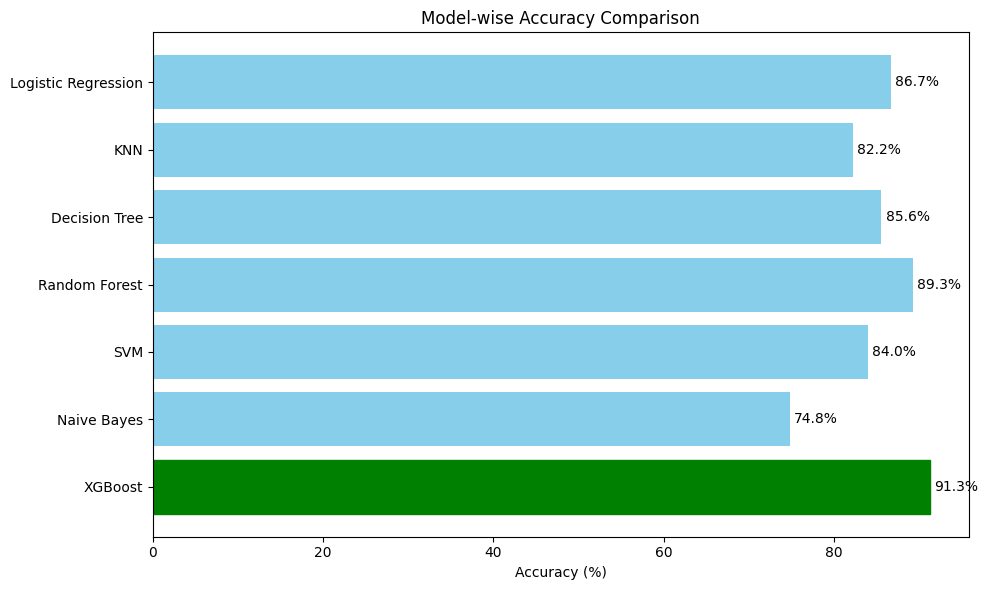

In [19]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVM', 'Naive Bayes', 'XGBoost']
accuracy = [86.7, 82.2, 85.6, 89.3, 84.0, 74.8, 91.3]

plt.figure(figsize=(10,6))
bars = plt.barh(models, accuracy, color='skyblue')
plt.xlabel("Accuracy (%)")
plt.title("Model-wise Accuracy Comparison")

# Highlight the best model
bars[-1].set_color('green')
for i, v in enumerate(accuracy):
    plt.text(v + 0.5, i, f"{v}%", va='center')

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 📌 8. Conclusion
- Successfully classified rural infrastructure projects using ML.
- XGBoost performed best with ~91.3% accuracy.
- Preprocessing included label encoding and standard scaling.